# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended content.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit the urls below and take a look at their source code through Chrome DevTools. You'll need to identify the html tags, special class names, etc used in the html content you are expected to extract.

**Resources**:
- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide)
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

In [1]:
import requests
import bs4  
import pandas as pd

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are already imported for you. If you prefer to use additional libraries feel free to do it.

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [2]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [3]:
response = requests.get(url)  # Llamo a la api con get

In [4]:
html = response.content    # Meto el contenido y lo previsualizo
html[:1000]

b'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"  data-a11y-animated-images="system" data-a11y-link-underlines="true">\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-b92e9647318f.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-5d486a4ede8e.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" 

In [5]:
parsed_html = bs4.BeautifulSoup(html, "html.parser") 

In [6]:
parsed_html.head
# parsed_html.body
# parsed_html.title

<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-b92e9647318f.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-5d486a4ede8e.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/assets/dark_dimmed-27c8d635e4e5.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_high_contrast" data-href="https://github.githubassets.c

In [7]:
parsed_html.body.a

<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>

In [8]:
# find 1 "h1" tag:
article = parsed_html.find("h1")
article

<h1 class="sr-only" id="search-suggestions-dialog-header">Search code, repositories, users, issues, pull requests...</h1>

In [9]:
# find all "h1" tag:
article = parsed_html.find_all("h1", {"class": "h3 lh-condensed"})
article

[<h1 class="h3 lh-condensed">
 <a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":26993056,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="6ad1cc14b732341b0091ee852b53af04da855edb9086b70bb3f32e6df929b489" data-view-component="true" href="/krahets">
             Yudong Jin
 </a> </h1>,
 <h1 class="h3 lh-condensed">
 <a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":18682411,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="0e5e276eec1121e5b28abff5a8aa821513cf20ddeb8f946c49c9b79ad5d28100" data-view-component="true" href="/Vaibhavs10">
             Vaibhav

In [10]:
article[0].contents

['\n',
 <a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":26993056,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="6ad1cc14b732341b0091ee852b53af04da855edb9086b70bb3f32e6df929b489" data-view-component="true" href="/krahets">
             Yudong Jin
 </a>,
 ' ']

In [ ]:
# article[0].contents[1].name

In [11]:
articles = []   # Creo lista vacía
for a in article:   # Para cada a in article guárdalo en una string y lo parseo con beatifulshoup
    a = str(a)
    soup_a = bs4.BeautifulSoup(a, "html.parser")
    list_a = soup_a.find_all("a")   # Encuentro todas las a
    for e in list_a:                # Por cada elemento guardado
        articles.append(e.string.strip())        # Hazme un append sin los espacios en blanco
        
print(len(articles))

25


In [12]:
articles

['Yudong Jin',
 'Vaibhav Srivastav',
 'Arseny Kapoulkine',
 'Brian Smith',
 'Andrew McKnight',
 'Laurent Mazare',
 'Radamés Ajna',
 'Nikita Sobolev',
 'lllyasviel',
 'Vectorized',
 'Stephen Haberman',
 'Norman Maurer',
 'Stan Girard',
 'Andreas Thomas',
 'Stella Laurenzo',
 'Jake Vanderplas',
 'Chris Villa',
 'Stephen Celis',
 "John O'Reilly",
 'Chris Banes',
 'Felix Yan',
 'Jinzhe Zeng',
 'George Hotz',
 'Miguel Ángel Durán',
 'Felix Kratz']

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

#### Display the trending Python repositories in GitHub.

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [13]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'

In [14]:
response = requests.get(url)  # Llamo a la api con get

In [15]:
html = response.content                                     # Contenido
parsed_html = bs4.BeautifulSoup(html, "html.parser")        # Parseo

In [20]:
parsed_html.body                                         # Trasteo

<body class="logged-out env-production page-responsive" style="word-wrap: break-word;">
<div class="logged-out env-production page-responsive" data-turbo-body="" style="word-wrap: break-word;">
<div class="position-relative js-header-wrapper">
<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>
<span class="progress-pjax-loader Progress position-fixed width-full" data-view-component="true">
<span class="Progress-item progress-pjax-loader-bar left-0 top-0 color-bg-accent-emphasis" data-view-component="true" style="width: 0%;"></span>
</span>
<script crossorigin="anonymous" defer="defer" src="https://github.githubassets.com/assets/vendors-node_modules_github_remote-form_dist_index_js-node_modules_delegated-events_dist_inde-94fd67-99519581d0f8.js" type="application/javascript"></script>
<script crossorigin="anonymous" defer="defer" src="https://github.githubassets.com/assets/sessions-76e28d5c9536.

In [25]:
# find 1 "a" tag:
tag_a = parsed_html.find_all("a", {"data-hydro-click": })
tag_a
tag_a = tag.has_attr('class')

SyntaxError: expression expected after dictionary key and ':' (4071560203.py, line 2)

In [28]:
def has_class_but_no_id(tag):
    return tag.has_attr('data-hydro-click')

In [ ]:
has_class_but_no_id(tag)

In [31]:
parsed_html.find_all(has_class_but_no_id)


[<a class="d-inline-block d-lg-none flex-order-1 f5 no-underline border color-border-default rounded-2 px-2 py-1 color-fg-inherit" data-hydro-click='{"event_type":"authentication.click","payload":{"location_in_page":"site header","repository_id":null,"auth_type":"SIGN_UP","originating_url":"https://github.com/trending/python?since=daily","user_id":null}}' data-hydro-click-hmac="0c767923f5365e750151dace0923e99c3373611f20347de3938097b9f5c42830" href="/signup?ref_cta=Sign+up&amp;ref_loc=header+logged+out&amp;ref_page=%2Ftrending%2Fpython&amp;source=header">
             Sign up
           </a>,
 <a class="HeaderMenu-link HeaderMenu-link--sign-in flex-shrink-0 no-underline d-block d-lg-inline-block border border-lg-0 rounded rounded-lg-0 p-2 p-lg-0" data-ga-click="(Logged out) Header, clicked Sign in, text:sign-in" data-hydro-click='{"event_type":"authentication.click","payload":{"location_in_page":"site header menu","repository_id":null,"auth_type":"SIGN_UP","originating_url":"https://git

#### Display all the image links from Walt Disney wikipedia page.

In [2]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [3]:
# your code here

In [4]:
response = requests.get(url)  # Llamo a la api con get

In [5]:
html = response.content                                     # Contenido
parsed_html = bs4.BeautifulSoup(html, "html.parser")        # Parseo

In [6]:
# find "img" tag:
images = parsed_html.find_all(src=True)                     # Localizo todas las imágenes scr, pero hay algunos logos png
images

[<script async="" src="/w/load.php?lang=en&amp;modules=startup&amp;only=scripts&amp;raw=1&amp;skin=vector-2022"></script>,
 <img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/icons/wikipedia.png" width="50"/>,
 <img alt="Wikipedia" class="mw-logo-wordmark" src="/static/images/mobile/copyright/wikipedia-wordmark-en.svg" style="width: 7.5em; height: 1.125em;"/>,
 <img alt="The Free Encyclopedia" class="mw-logo-tagline" height="13" src="/static/images/mobile/copyright/wikipedia-tagline-en.svg" style="width: 7.3125em; height: 0.8125em;" width="117"/>,
 <img alt="Featured article" class="mw-file-element" data-file-height="443" data-file-width="466" decoding="async" height="19" src="//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/30px-Cscr-featured.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/40px-Cscr-feature

In [8]:
images_jpg = []
for imagen in images: 
    if imagen['src'].endswith(".jpg"):
        images_jpg.append(imagen)

In [9]:
images_jpg

[<img alt="Pale yellow wooden house with brown trim surrounded by white picket fence" class="mw-file-element" data-file-height="1080" data-file-width="1440" decoding="async" height="165" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/220px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/330px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/440px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg 2x" width="220"/>,
 <img class="mw-file-element" data-file-height="1086" data-file-width="1576" decoding="async" height="152" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page.

In [10]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 

In [ ]:
# your code here

In [11]:
response = requests.get(url)  # Llamo a la api con get

In [12]:
html = response.content                                     # Contenido
parsed_html = bs4.BeautifulSoup(html, "html.parser")        # Parseo

In [13]:
# find "links" tag:
links = parsed_html.find_all('a', href=True)      # Localizo todas las etiquetas a con href
links

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>,
 <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>,
 <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>,
 <a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a>,
 <a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a>,
 <a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a>,
 <a href="https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_en.wikipedia.org&amp;uselang=en" title="Support us by donating to the Wikimedia Foundation"><span>Donate</span></a>,
 <a href=

#### Find the number of titles that have changed in the United States Code since its last release point.

In [14]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [15]:
# your code here

In [16]:
response = requests.get(url)  # Llamo a la api con get

In [17]:
html = response.content                                     # Contenido
parsed_html = bs4.BeautifulSoup(html, "html.parser")        # Parseo

In [18]:
# find div class="usctitle":
divs = parsed_html.find_all('div', class_='usctitle')      
divs

[<div class="usctitle" id="alltitles">
 
           All titles in the format selected compressed into a zip archive.
 
         </div>,
 <div class="usctitle" id="heading">
 
               
 
 	        </div>,
 <div class="usctitle" id="us/usc/t1">
 
           Title 1 - General Provisions <span class="footnote"><a class="fn" href="#fn">٭</a></span>
 </div>,
 <div class="usctitle" id="us/usc/t2">
 
           Title 2 - The Congress
 
         </div>,
 <div class="usctitle" id="us/usc/t3">
 
           Title 3 - The President <span class="footnote"><a class="fn" href="#fn">٭</a></span>
 </div>,
 <div class="usctitle" id="us/usc/t4">
 
           Title 4 - Flag and Seal, Seat of Government, and the States <span class="footnote"><a class="fn" href="#fn">٭</a></span>
 </div>,
 <div class="usctitle" id="us/usc/t5">
 
           Title 5 - Government Organization and Employees <span class="footnote"><a class="fn" href="#fn">٭</a></span>
 </div>,
 <div class="usctitle" id="us/usc/t6">
 
     

#### Find a Python list with the top ten FBI's Most Wanted names.

In [19]:
# This is the url you will scrape in this exercise
url = 'https://www.fbi.gov/wanted/topten'

In [ ]:
# your code here

In [20]:
response = requests.get(url)  # Llamo a la api con get

In [21]:
html = response.content                                     # Contenido
parsed_html = bs4.BeautifulSoup(html, "html.parser")        # Parseo

In [25]:
primer_h3 = parsed_html.find('h3')
print(primer_h3)                   # No hay h3

None


In [26]:
div_results = parsed_html.find('div', class_="query-results")
print(div_results)                  # None

None


# Pendiente

In [23]:
# find h3 class="title":
names = parsed_html.find_all('h3')      
names

[]

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<!-- saved from url=(0023)http://kidmondo.com/404 -->
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="noindex,nofollow" name="robots"/>
<title>Security Prompt</title>
<style>body{background:#fff;margin:0;padding:20px;text-align:center;font-family:Arial,Helvetica,sans-serif;font-size:14px;color:#666}.error_page{width:600px;padding:50px;margin:auto}.error_page h1{margin:20px 0 0}.error_page p{margin:10px 0;padding:0}a{color:#9caa6d;text-decoration:none}a:hover{color:#9caa6d;text-decoration:underline}</style>
<meta content="35" http-equiv="refresh"/>
</head>
<body>
<div class="error_page">

<h1>Additional security has been added.</h1>
<center><div class="cf-browser-verification cf-im-under-attack"><noscript><h1 style="color:#b
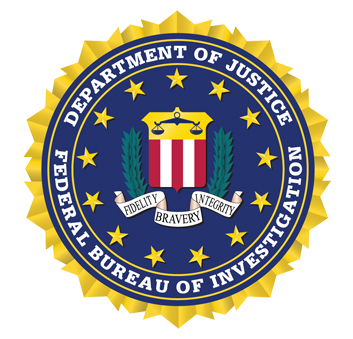

In [24]:
print(parsed_html)

####  Display the 20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe.

In [27]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'

In [28]:
# your code here

In [29]:
response = requests.get(url)  # Llamo a la api con get

In [30]:
html = response.content                                     # Contenido
parsed_html = bs4.BeautifulSoup(html, "html.parser")        # Parseo

In [32]:
# Find table
table = parsed_html.find('table')
print(table)  

<table><tr><th></th><th>Period</th><th>Magnitude</th><th class="moref">Depth</th><th class="moref">Latitude</th><th class="moref">Longitude</th>
<th class="moref"></th><th class="moref">Reports</th><th class="moref">Images</th><th class="moref">Comments</th>
</tr>
<tr><td>Min: </td><td><input aria-label="date min" id="datemin" max="2023-11-06" min="2004-10-01" name="datemin" type="date"/></td><td><input aria-label="magnitude min" id="magmin" max="11" min="0" name="magmin" step="0.1" type="number"/></td><td><input aria-label="depth min" class="moref" id="depthmin" max="10000" min="-10" name="depthmin" step="1" type="number"/></td>
<td><input aria-label="latitude min" class="moref" id="latmin" max="90" min="-90" name="latmin" step="0.001" type="number"/></td>
<td class="ic"><input aria-label="longitude min" class="moref" id="lonmin" max="180" min="-180" name="lonmin" step="0.001" type="number"/></td>
<td class="moref with"><div class="moref coords-icon" data-maploaded="false"></div>With:

In [35]:
data = table.find_all(['th', 'td'])
data

[<th></th>,
 <th>Period</th>,
 <th>Magnitude</th>,
 <th class="moref">Depth</th>,
 <th class="moref">Latitude</th>,
 <th class="moref">Longitude</th>,
 <th class="moref"></th>,
 <th class="moref">Reports</th>,
 <th class="moref">Images</th>,
 <th class="moref">Comments</th>,
 <td>Min: </td>,
 <td><input aria-label="date min" id="datemin" max="2023-11-06" min="2004-10-01" name="datemin" type="date"/></td>,
 <td><input aria-label="magnitude min" id="magmin" max="11" min="0" name="magmin" step="0.1" type="number"/></td>,
 <td><input aria-label="depth min" class="moref" id="depthmin" max="10000" min="-10" name="depthmin" step="1" type="number"/></td>,
 <td><input aria-label="latitude min" class="moref" id="latmin" max="90" min="-90" name="latmin" step="0.001" type="number"/></td>,
 <td class="ic"><input aria-label="longitude min" class="moref" id="lonmin" max="180" min="-180" name="lonmin" step="0.001" type="number"/></td>,
 <td class="moref with"><div class="moref coords-icon" data-maploa

# Pendiente

#### Count the number of tweets by a given Twitter account.
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### Number of followers of a given twitter account
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the followers for any provided account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### List all language names and number of related articles in the order they appear in wikipedia.org.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [ ]:
# your code here

#### A list with the different kind of datasets available in data.gov.uk.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [ ]:
# your code here

#### Display the top 10 languages by number of native speakers stored in a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [ ]:
# your code here

## Bonus
#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### Display IMDB's top 250 data (movie name, initial release, director name and stars) as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Display the movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = input('Enter the city: ')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code here

#### Find the book name, price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
# your code here